# The ICM algorithm

### Requirements

* Magic state initializations

![alt text](images/y.png "Y")

![alt text](images/a.png "Y")

* Hadamard P and T gates

![alt text](images/HPT.png "HPT")

* V gate

![alt text](images/vgate.png "V gate")

## Toffoli and Hadamard interms of PVT
     
* Toffoli decomposition

![alt text](images/toffoli_decomposition.png "ICM algorithm")

* H decomposition

![alt text](images/H_decomposition.png "H decomposition")

* Measurement
     Z {0, 1} basis | X {+, -} basis

## Gate teleportation

![alt text](images/gate_teleportation.png "H decomposition")

## ICM algorithm

![alt text](images/icm_algo.png "ICM algorithm")

# Qutip

### Define a new circuit and add some gates

In [30]:
# Add the source file for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports
import numpy as np
from qutip import QubitCircuit
from source.cicm.icm import Icm, decompose_SNOT, visualise, make_json_file
from source.tqec.tqc_generator import convert

In [31]:
qcircuit = QubitCircuit(2, reverse_states=False)
qcircuit.add_gate("CNOT", targets= [0], controls=[1])
qcircuit.add_gate("RZ", arg_value = np.pi / 2, arg_label=r"\pi/2", targets=[0])
qcircuit.add_gate("CNOT", targets= [0], controls=[1])

### Display circuit as list of gates

In [32]:
qcircuit.gates

[Gate(CNOT, targets=[0], controls=[1]),
 Gate(RZ, targets=[0], controls=None),
 Gate(CNOT, targets=[0], controls=[1])]

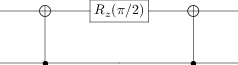

In [33]:
qcircuit.png

### Initialise the ICM model with given circuit and covert to ICM representation using `to_icm`

/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate IN
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate Y
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate z
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate xz
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate OUT
  warnings.warn("Unknown gate %s" % name)


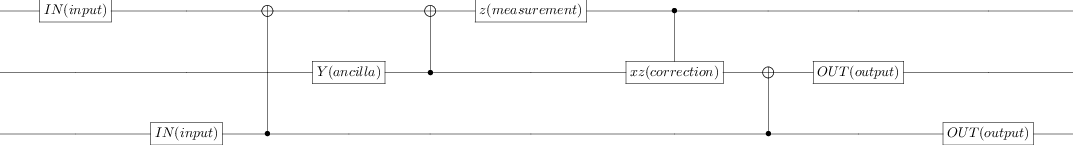

In [34]:
# Create a new icm_model object
icm_model = Icm(qcircuit)
icm_representation = icm_model.to_icm()
icm_representation.png

# Apply the function visualise for better viewing

* Push all initialisations, and inputs to the start and measurement and corrections to the end.
* Get a json dictionary of the gates which can be used to construct the TQC equivalent of the circuit for viewing

This should ideally be followed by Pauli tracking which gives the exact sequence for applying gate corrections to each qubit at the end of the circuit

/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate IN
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate Y
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate z
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate xz
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate OUT
  warnings.warn("Unknown gate %s" % name)


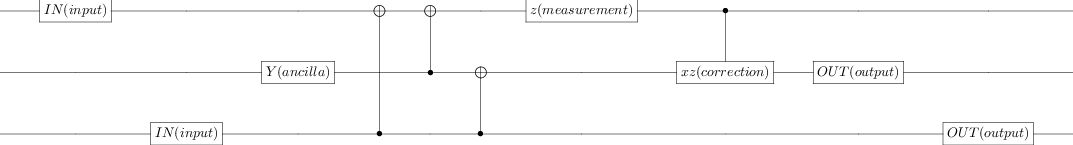

In [35]:
pauli_tracked, json_dict = visualise(icm_representation)
pauli_tracked.png

# Ancillae cost calculation for a ICM circuit

![alt text](cost.png "Logo Title Text 1")

### `ancilla_cost()`

In [36]:
"""
Calculate the number of ancillae for each gate in a given ICM circuit.
"""
ancilla = icm_model.ancilla_cost()
print(ancilla)

{'V': 0, 'TOFFOLI': 0, 'T': 0, 'P': 1, 'SNOT': 0}


# Geometry of the circuit in TQC viewer

* Generate a json file for the TQC viewer in https://github.com/rxnew/tqc_viewer

* After generating the json file, you need to convert it to the geometrical data format by using the converter in https://github.com/rxnew/tqec. To generate the ICM geometry information you need to run `python3 main.py convert icm <filename> 

* Open the index.html file in the TQC viewer and drag and drop the file generated below.


In [37]:
json_circuit = make_json_file(json_dict, "icm_test")

In [38]:
convert("tqec", 'icm_test.json', 'tqc_geometry')

# Visualising the TQC geometry

* Open TQC viewer from [tqc_viewer/index.html](tqc_viewer/index.html)

* Drag and drop the file you created `tqc_geometry` in the window and you can see your circuit

* Click and scroll to zoom in our out

* Click and drag to change the view

# Remaining work

* Pauli tracking

* Major code clean up, documentation and refactoring

* Testing and verification